In [2]:
# for development
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, load_digits

from shapediscover import ShapeDiscover, shapediscover_plot

from synthetic_data import sphere, interval, double_circle
from plotting_and_preprocessing import plot_and_return_2d_embedding, plot_mapper, plot_ball_mapper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simple shapes

----- Interval -----
pointcloud shape: (1000, 2)
time create graph 0.07992911338806152
time clustering 0.022150278091430664
time optimization 0.9596679210662842
time create simplicial complex 0.246690034866333
time compute persistence 0.00021886825561523438
initialization precover


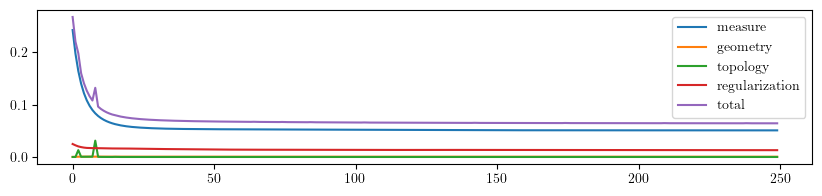

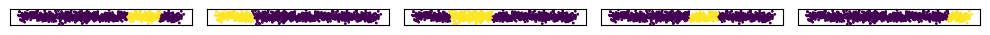

output precover


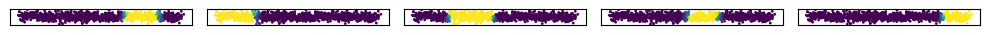

output fuzzy cover


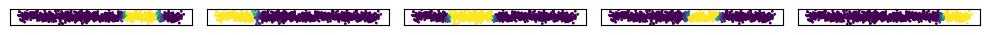

output cover


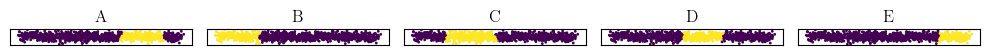

nerve of fuzzy cover by thresholding at 0.1


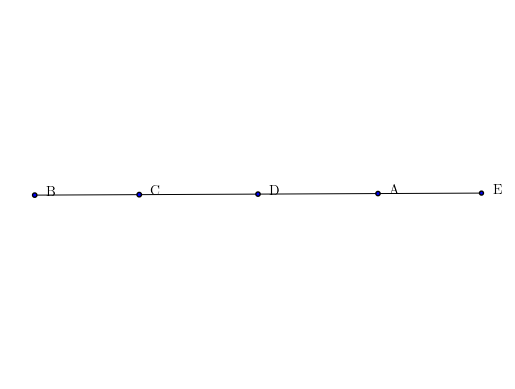

barcode of fuzzy cover


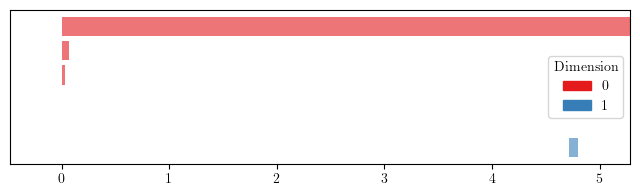

----- Blobs -----
pointcloud shape: (500, 2)
time create graph 0.06718325614929199
time clustering 0.006842136383056641
time optimization 0.4732530117034912
time create simplicial complex 0.20931291580200195
time compute persistence 0.00013971328735351562
initialization precover


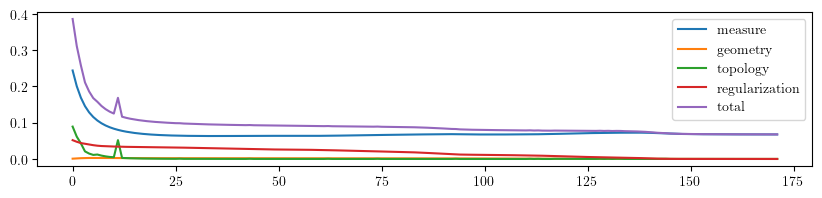

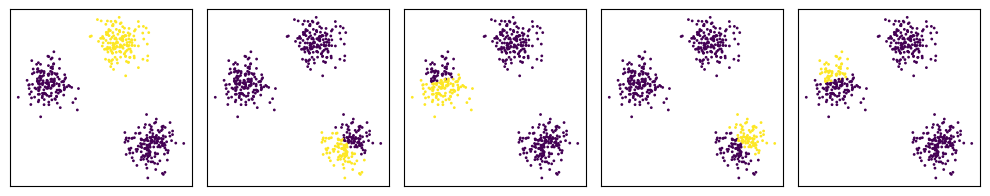

output precover


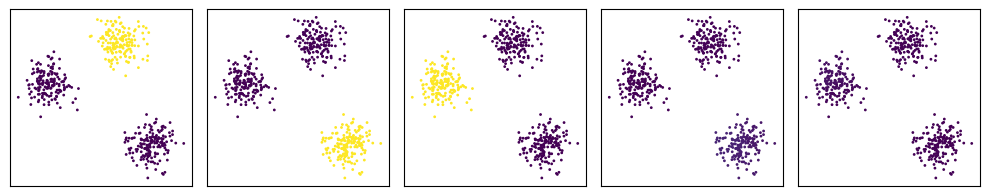

output fuzzy cover


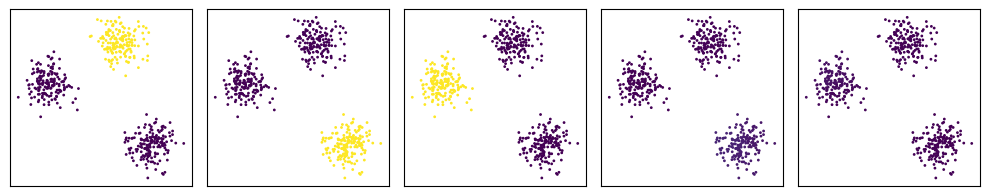

output cover


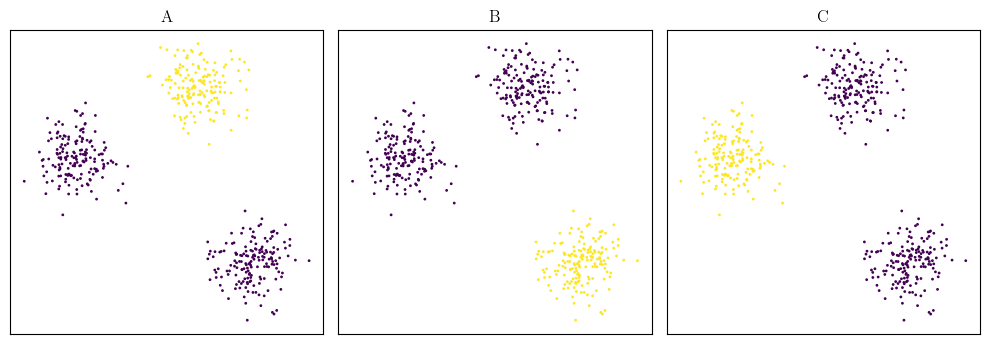

nerve of fuzzy cover by thresholding at 0.1


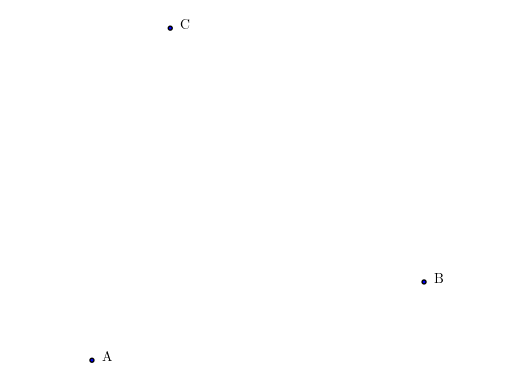

barcode of fuzzy cover


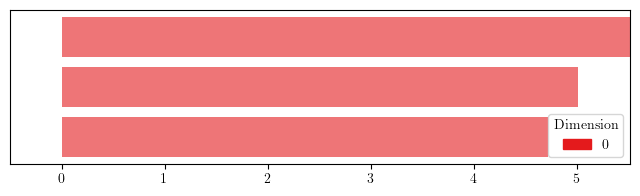

----- Circle -----
pointcloud shape: (1000, 2)
time create graph 0.07530927658081055
time clustering 0.027420759201049805
time optimization 0.637688159942627
time create simplicial complex 0.22662687301635742
time compute persistence 2.6226043701171875e-05
initialization precover


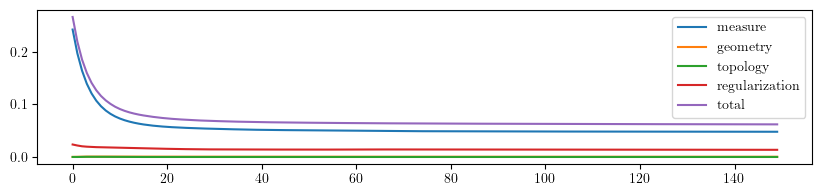

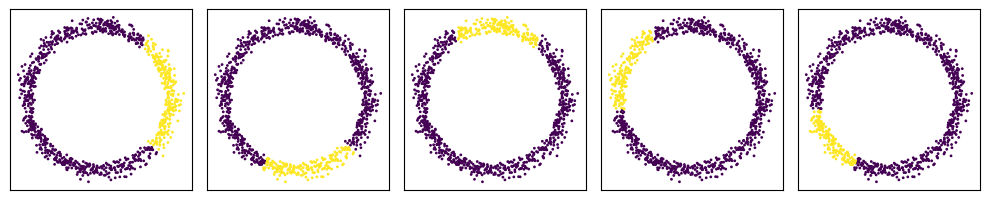

output precover


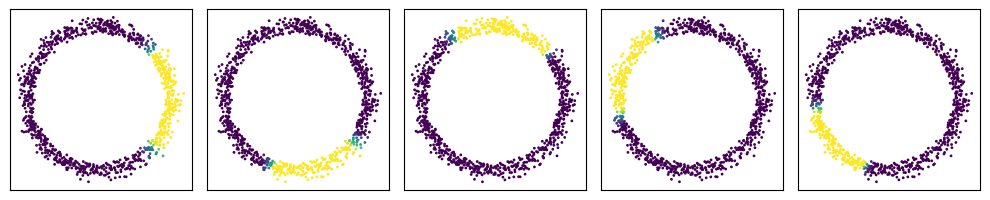

output fuzzy cover


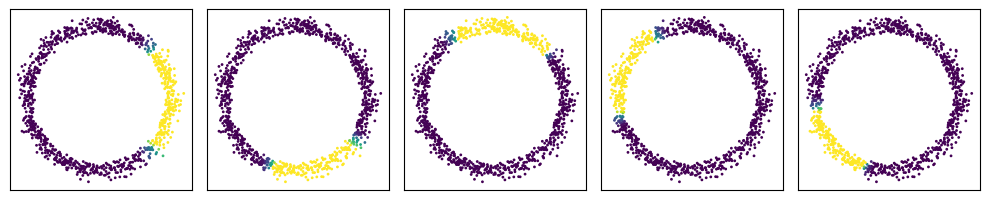

output cover


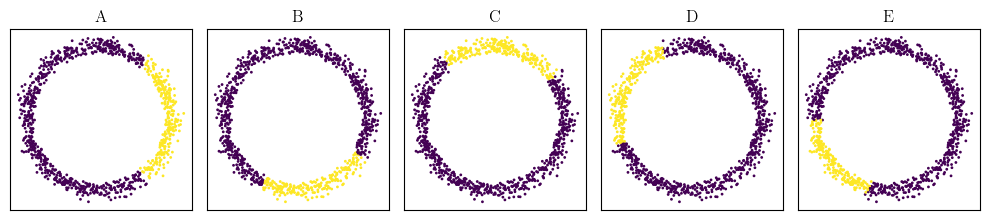

nerve of fuzzy cover by thresholding at 0.1


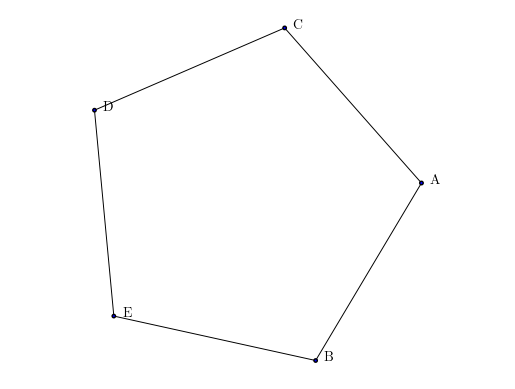

barcode of fuzzy cover


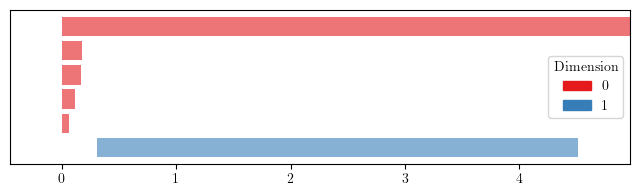

----- Two circles -----
pointcloud shape: (1000, 2)
time create graph 0.07606315612792969
time clustering 0.035790205001831055
time optimization 0.7143857479095459
time create simplicial complex 0.23030495643615723
time compute persistence 9.703636169433594e-05
initialization precover


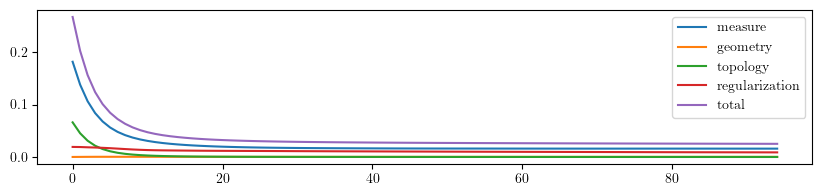

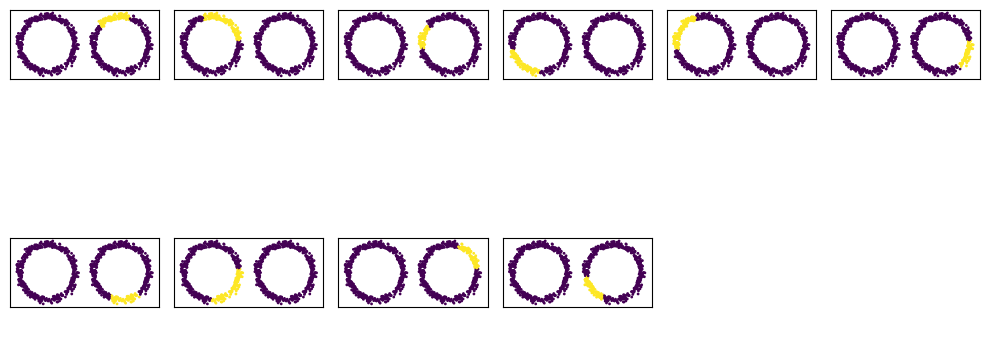

output precover


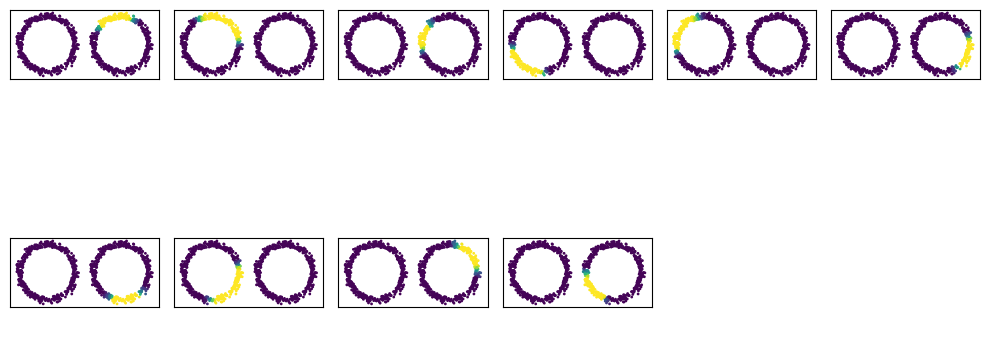

output fuzzy cover


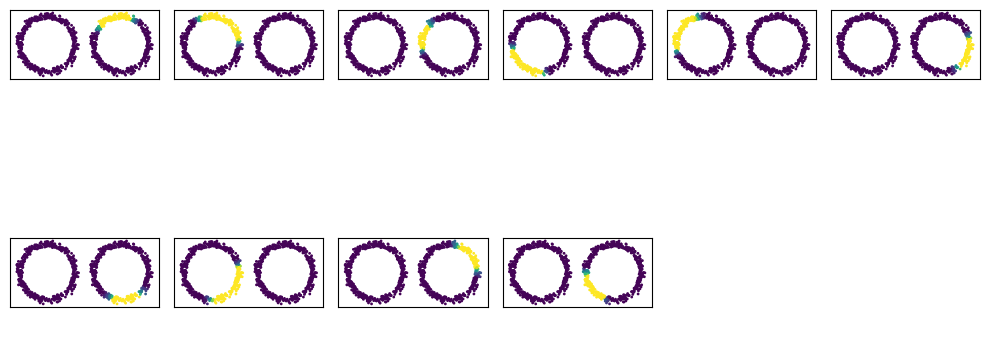

output cover


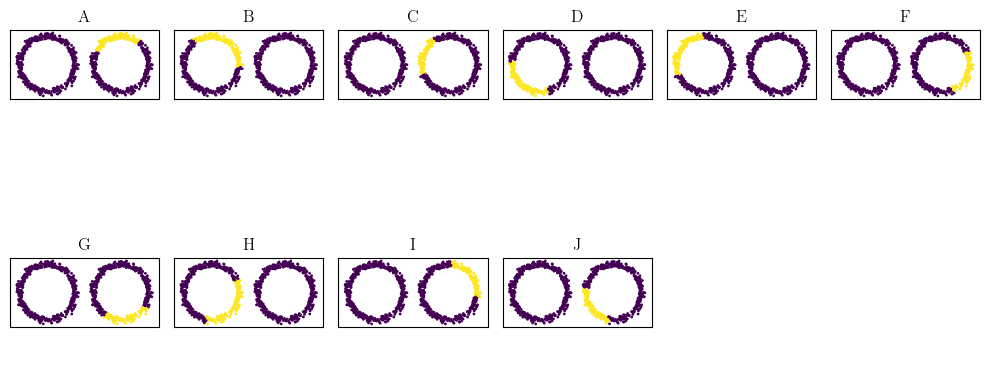

nerve of fuzzy cover by thresholding at 0.1


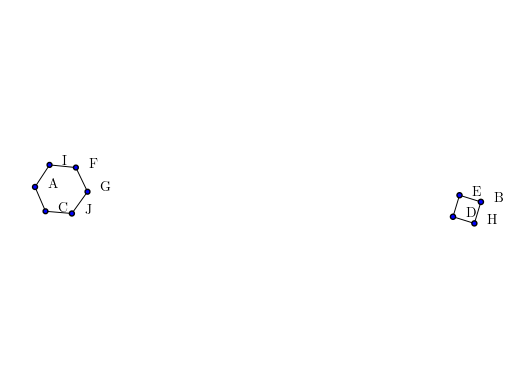

barcode of fuzzy cover


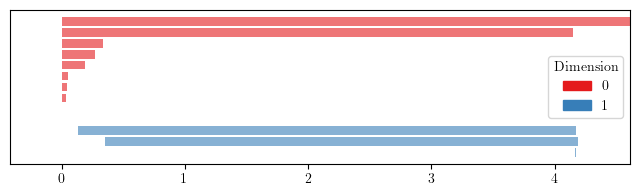

In [4]:
datasets = [
    interval(1000, noise_variance=0.001),
    make_blobs(n_samples=500, centers=3, n_features=2, random_state=0, cluster_std=0.4)[0],
    sphere(1000, 1, noise_variance=0.01),
    double_circle(500, noise_variance=1e-2),
]
names = ["Interval", "Blobs", "Circle", "Two circles"]
n_covers = [5, 5, 5, 10]

for X, name, n_cov in zip(datasets, names, n_covers):
    print("----- " + name + " -----")
    discover = ShapeDiscover(
        n_cover=n_cov,
    )
    discover.fit(X)
    discover.fit_persistence()
    shapediscover_plot(discover, X, cover_threshold=0.1, max_vertex_size=0.01)

# Topological inference

## Sphere

pointcloud shape: (2000, 3)
time create graph 0.0970768928527832
time clustering 0.03988981246948242
time optimization 3.418292999267578
time create simplicial complex 0.2142956256866455
time compute persistence 0.00018095970153808594
initialization precover


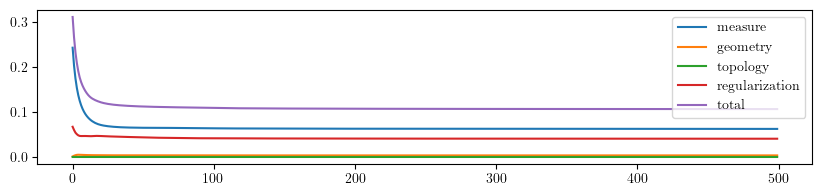

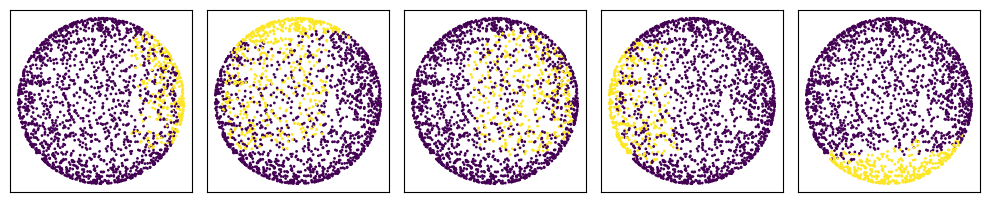

output precover


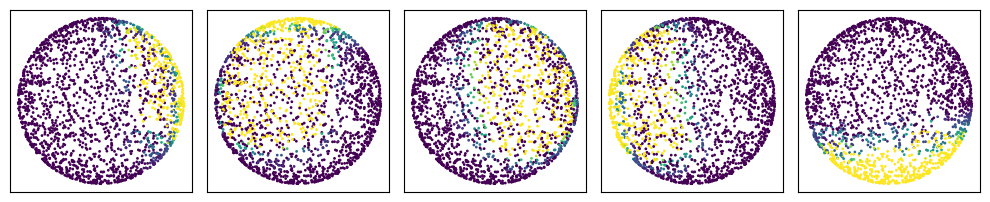

output fuzzy cover


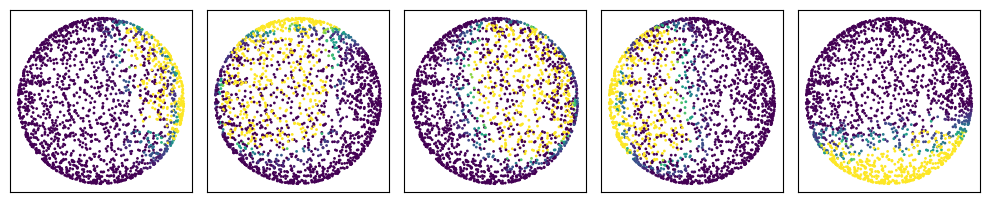

output cover


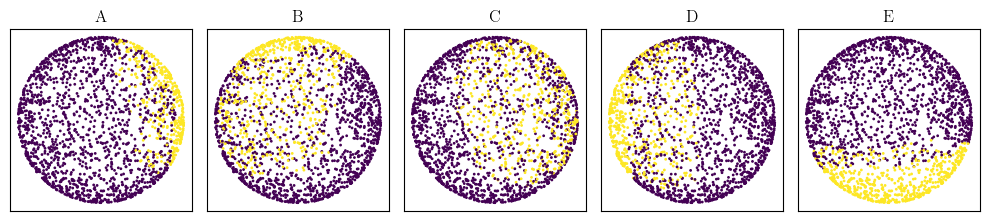

nerve of fuzzy cover by thresholding at 0.3


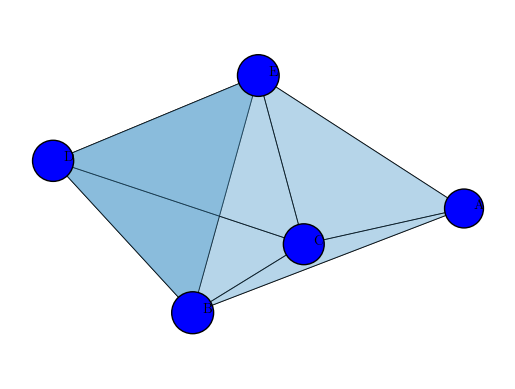

barcode of fuzzy cover


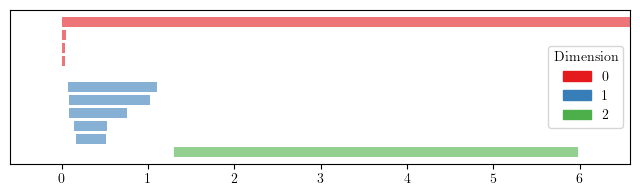

In [5]:
X = sphere(2000, 2)
discover = ShapeDiscover(
    n_cover=5,
    loss_weights=[1,10,1,10],
    n_max_iter=500,
)
discover.fit(X)
discover.fit_persistence(max_dimension=2, verbose=True)
shapediscover_plot(discover, X, cover_threshold=0.3)

## Human

pointcloud shape: (9508, 3)
time create graph 0.2409520149230957
time clustering 0.32047295570373535
time optimization 2.9540627002716064


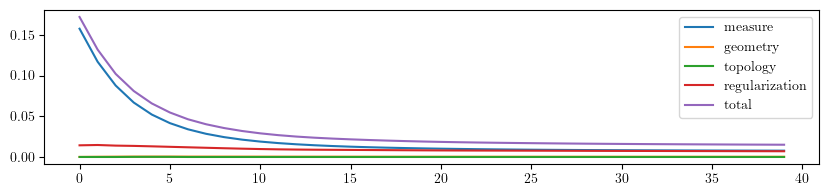

In [6]:
X = np.loadtxt("datasets/human.txt")
discover = ShapeDiscover(
    n_cover=17,
)
discover.fit(X)

nerve of fuzzy cover by thresholding at 0.5


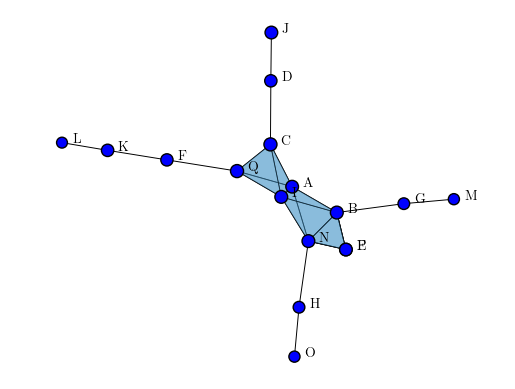

In [8]:
shapediscover_plot(
    discover,
    X,
    max_vertex_size=0.03,
    plot_subfunctions=["nerve"],
)

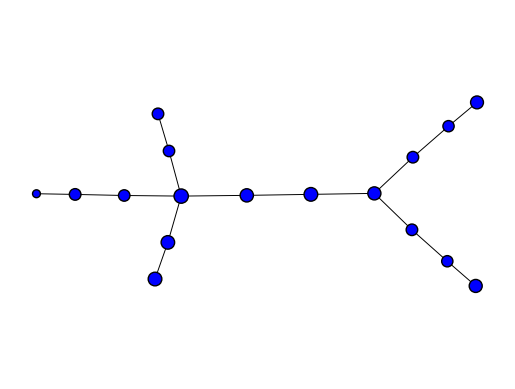

In [9]:
# mapper
overlap_perc = 0.2
dbscan_eps = 0.1
n_intervals = 9

filtering_function = X[:, 1]

mapper_cover = plot_mapper(
    X,
    filtering_function,
    overlap_perc,
    n_intervals,
    dbscan_eps,
    X,
    max_vertex_size=0.03,
    plot_subfunctions=["nerve"],
)

cover size: 18


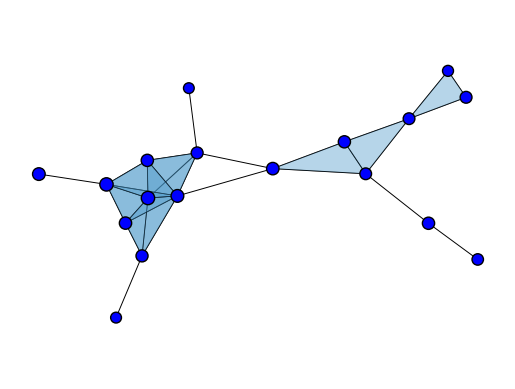

cover size: 26


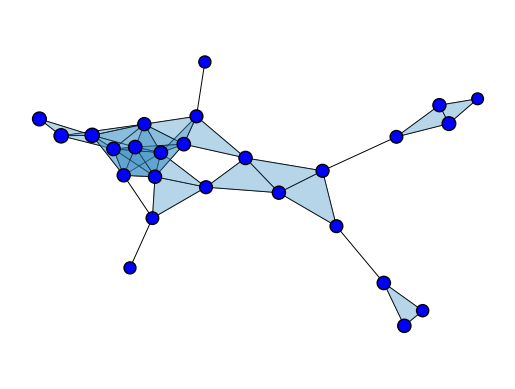

cover size: 48


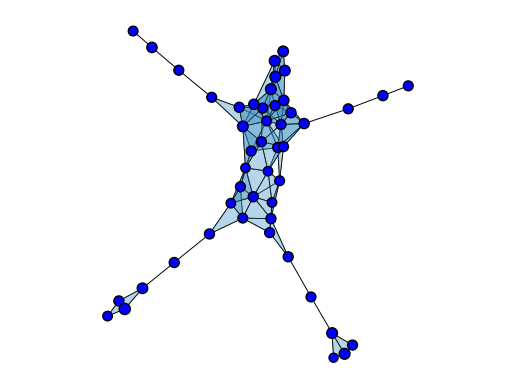

In [10]:
# BallMapper
for eps,eps_str in zip([0.25,0.2, 0.15], ["025","02","015"]):
    _, indices = plot_ball_mapper(
        X,
        eps,
        X,
        max_vertex_size=0.03,
        plot_letters=False,
        plot_subfunctions=["nerve"],
    )

## Octopus

pointcloud shape: (7812, 3)
time create graph 0.196746826171875
time clustering 0.3981766700744629
time optimization 2.3894529342651367


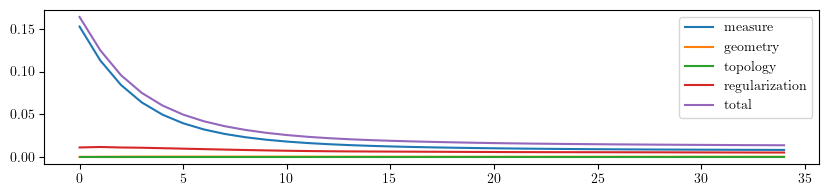

In [11]:
X = np.loadtxt("datasets/octopus.txt")
discover = ShapeDiscover(
    n_cover=20,
)
discover.fit(X)

nerve of fuzzy cover by thresholding at 0.5


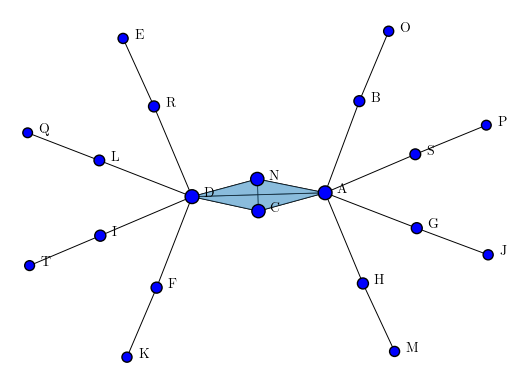

In [12]:
shapediscover_plot(
    discover,
    X[:, [1, 2]],
    max_vertex_size=0.03,
    plot_subfunctions=["nerve"],
)

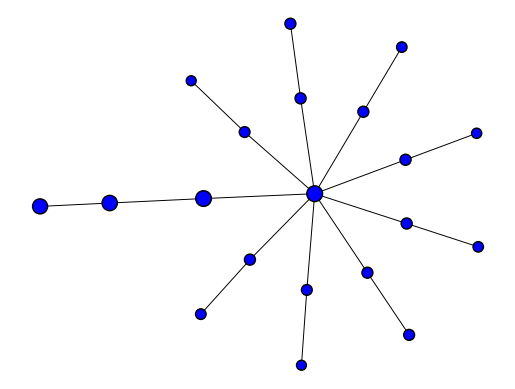

In [13]:
# mapper
overlap_perc = 0.1
dbscan_eps = 0.1
n_intervals = 6

filtering_function = X[:, 2]

mapper_cover = plot_mapper(
    X,
    filtering_function,
    overlap_perc,
    n_intervals,
    dbscan_eps,
    X[:,[1,2]],
    max_vertex_size=0.03,
    plot_subfunctions=["nerve"],
)

cover size: 51


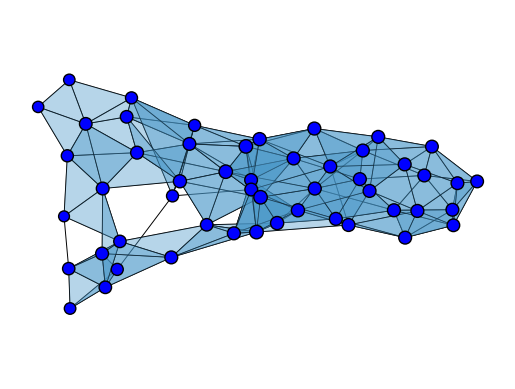

cover size: 68


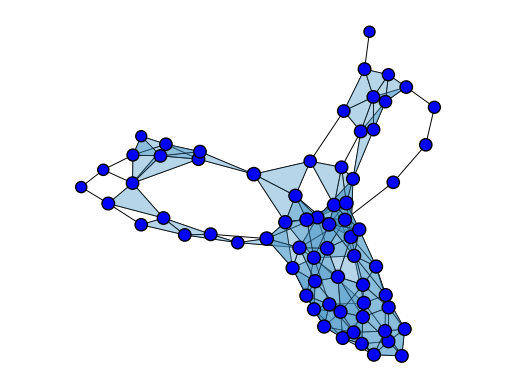

cover size: 80


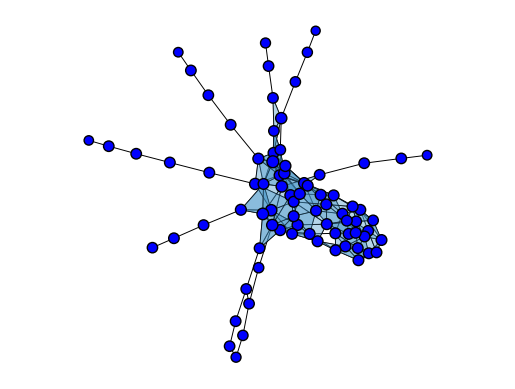

In [15]:
# BallMapper
for eps,eps_str in zip([0.2, 0.175, 0.15], ["02","0175","015"]):
    _, indices = plot_ball_mapper(
        X,
        eps,
        X,
        max_vertex_size=0.03,
        plot_letters=False,
        plot_subfunctions=["nerve"],
    )

## Rat brain torus

pointcloud shape: (10000, 6)
time create graph 0.288283109664917
time clustering 0.21450591087341309
time optimization 4.085970878601074


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time create simplicial complex 1.41575288772583
time compute persistence 0.0007231235504150391
barcode of fuzzy cover


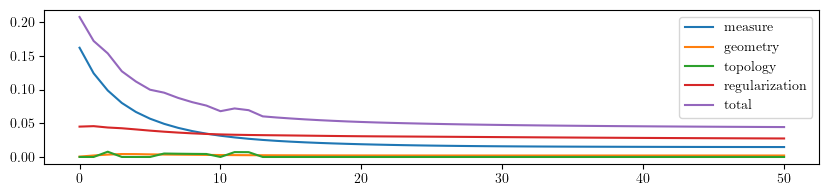

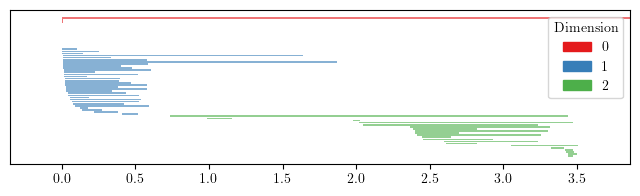

In [18]:
X = np.load("datasets/rat_brain/toremb_Y.npy")
discover = ShapeDiscover(
    n_cover=15,
)
discover.fit(X)
discover.fit_persistence(max_dimension=2)
shapediscover_plot(discover, None, plot_subfunctions=["barcode"], plot_name="shapediscover_ratbrain")

In [19]:
from experiment_functions import correct_homology_quotient
correct_homology_quotient(discover.persistence_diagram_, [1,2,1])

0.208

## Dynamical system video

pointcloud shape: (2022, 10)
time create graph 0.10166192054748535
time clustering 0.1005699634552002
time optimization 2.011737823486328
time create simplicial complex 35.24614405632019
time compute persistence 0.09015774726867676
barcode of fuzzy cover


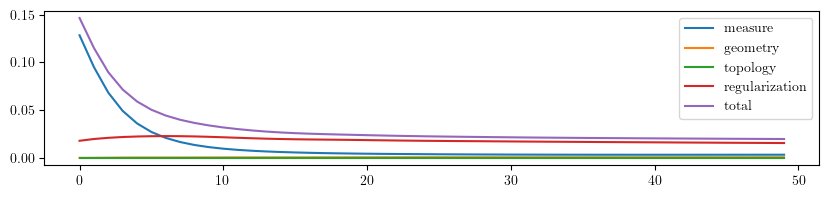

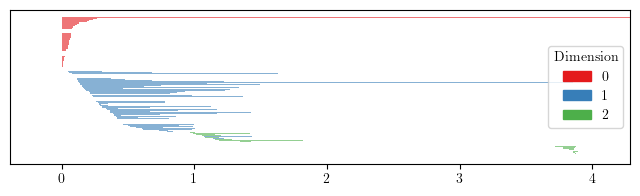

In [20]:
X = np.load("datasets/dynamical_system_video.npy")
discover = ShapeDiscover(
    n_cover=52,
)
discover.fit(X)
discover.fit_persistence(max_dimension=2)
shapediscover_plot(discover, None, plot_subfunctions=["barcode"])

# Large scale visualization

## Digits data

/Users/luisscoccola/code/shapediscover/venv_main/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/luisscoccola/code/shapediscover/venv_main/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


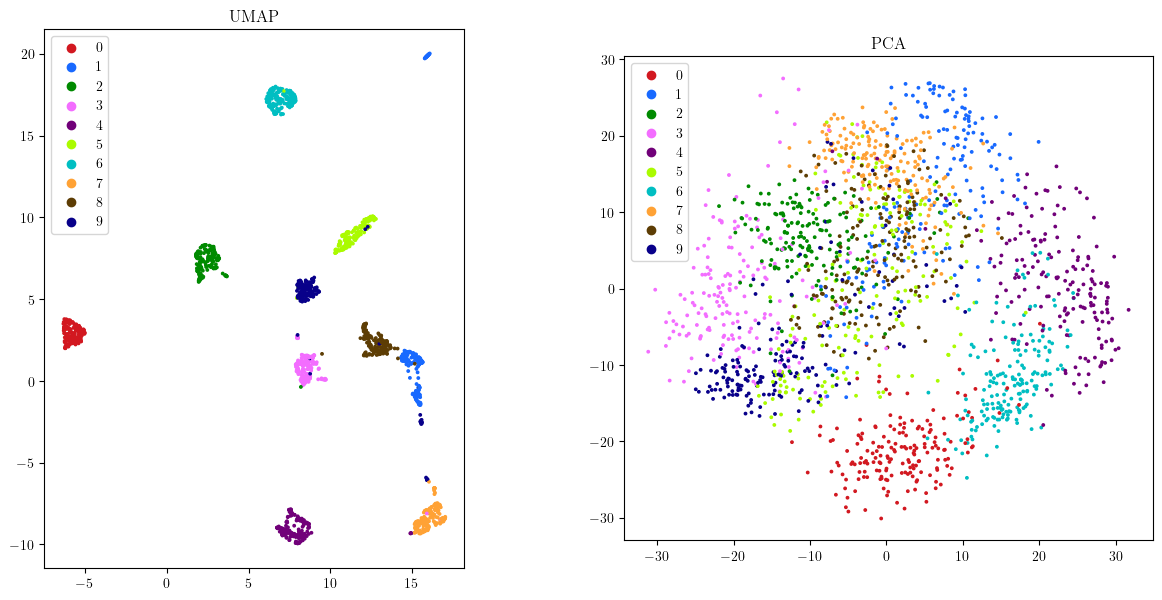

In [23]:
X, y = load_digits(return_X_y=True)
X_umap, X_pca = plot_and_return_2d_embedding(X,y=y, point_size=3)

pointcloud shape: (1797, 64)
time create graph 0.10576701164245605
time clustering 0.03208303451538086
time optimization 2.2816162109375


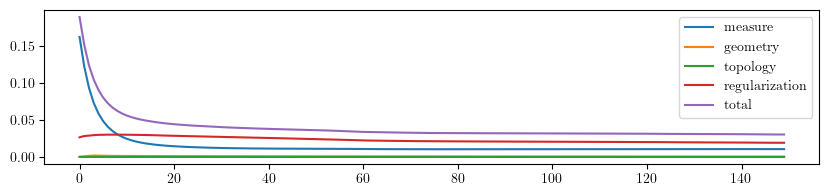

In [24]:
discover = ShapeDiscover(
    n_cover=15,
)
discover.fit(X)

output cover


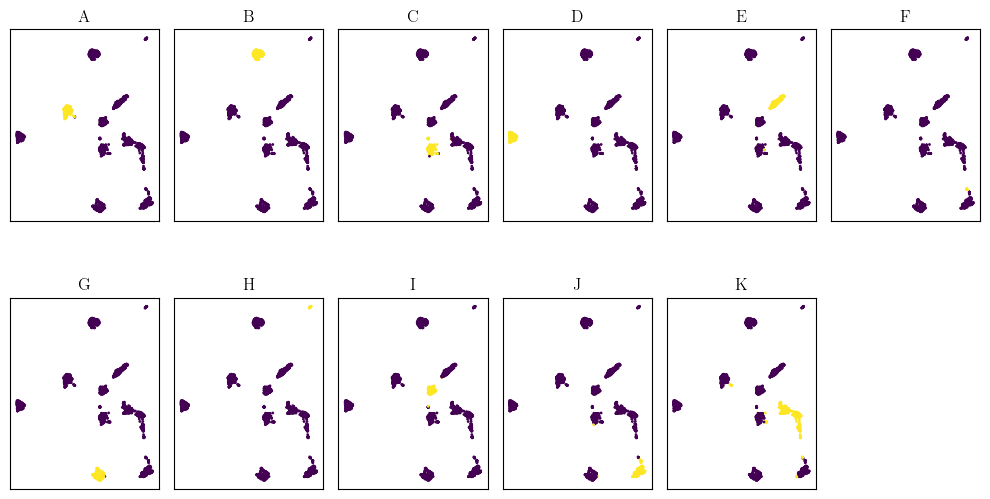

visualizations/pyvis_test.html
nerve of fuzzy cover by thresholding at 0.5


In [25]:
shapediscover_plot(
    discover,
    X_umap,
    y=y,
    cover_threshold=0.5,
    max_vertex_size=10,
    interactive=True,
    plot_subfunctions=["nerve","cover"]
)

## C. Elegans

/Users/luisscoccola/code/shapediscover/venv_main/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/luisscoccola/code/shapediscover/venv_main/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


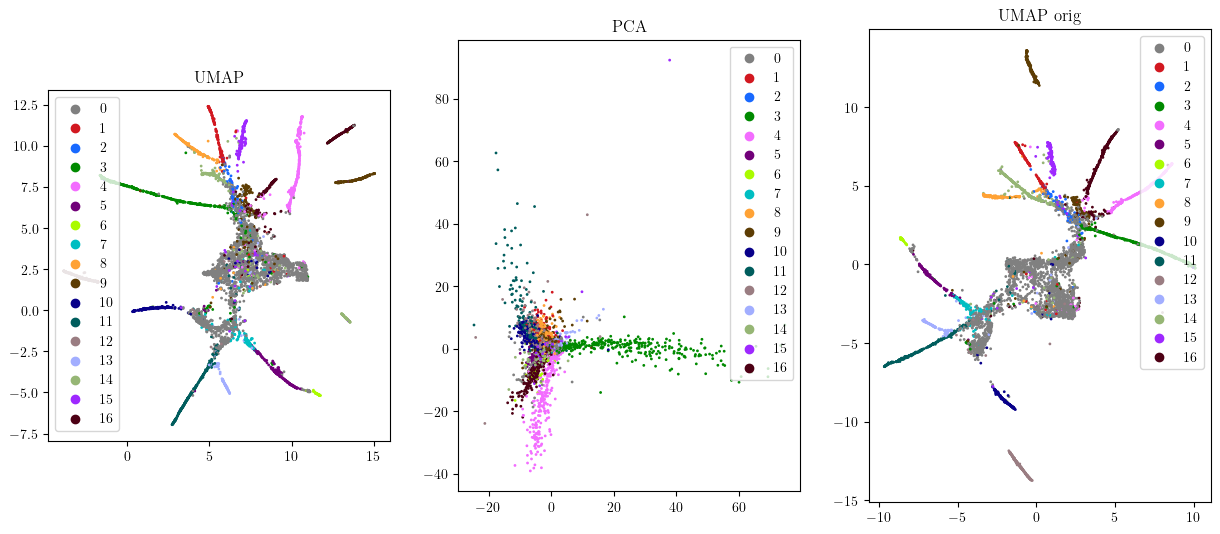

In [27]:
import csv

cell_data_dir = "datasets/celegans_embryo_data"

with open(f"{cell_data_dir}/CESub_Xa.csv", "r") as f:
    reader = csv.reader(f)
    data = list(reader)
data = data[1:]
data = [item[1:] for item in data]
X = np.array(data, dtype="float")

with open(f"{cell_data_dir}/CESub_Xu.csv", "r") as f:
    reader = csv.reader(f)
    data = list(reader)
data = data[1:]
data = [item[1:] for item in data]
X_umap = np.array(data, dtype="float")

with open(f"{cell_data_dir}/celltype.csv", "r") as f:
    reader = csv.reader(f)
    data = list(reader)
celltype = data[1:]
y = [item[1] for item in celltype]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)
classes = label_encoder.classes_

keep = [0, 2, 1, 4, 5, 7, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20]
y_filtered = [i if i in keep else -1 for i in y_numeric]

X_umap2, X_pca = plot_and_return_2d_embedding(
    X, y=y_filtered, X_dim_red=X_umap, X_dim_red_name="UMAP orig", n_neighbors=15, dummy_legend=True
)


In [ ]:
discover = ShapeDiscover(
    n_cover=100,
)
discover.fit(X)

pointcloud shape: (6188, 50)
time create graph 0.23735308647155762
time clustering 0.5272641181945801


output cover


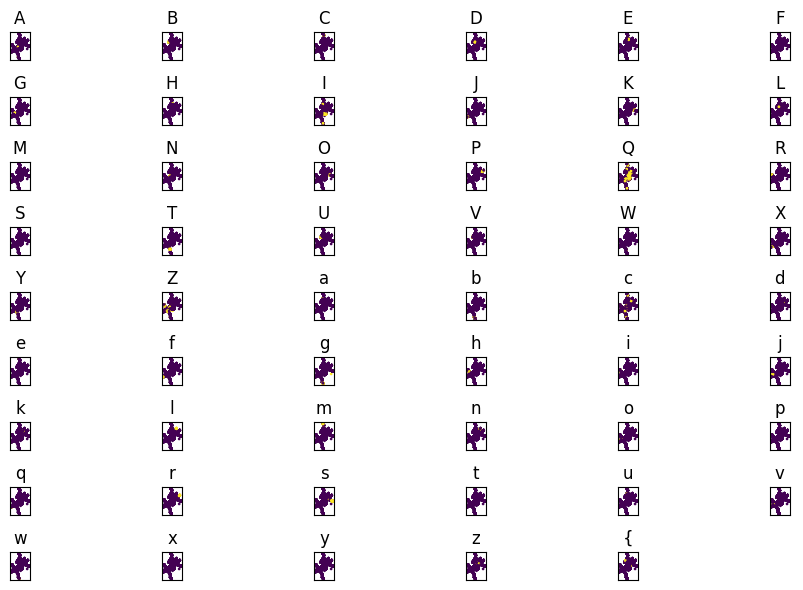

visualizations/pyvis_test.html
nerve of fuzzy cover by thresholding at 0.6


In [ ]:
shapediscover_plot(
    discover,
    X_umap,
    y=y_filtered,
    cover_threshold=0.6,
    max_vertex_size=10,
    interactive=True,
    dummy_legend=True,
    plot_subfunctions=["nerve", "cover"]# "initialization_precover"]
)

## MNIST

/Users/anonymousanonymous/code/covering-data/venv_main_pydot/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/anonymousanonymous/code/covering-data/venv_main_pydot/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


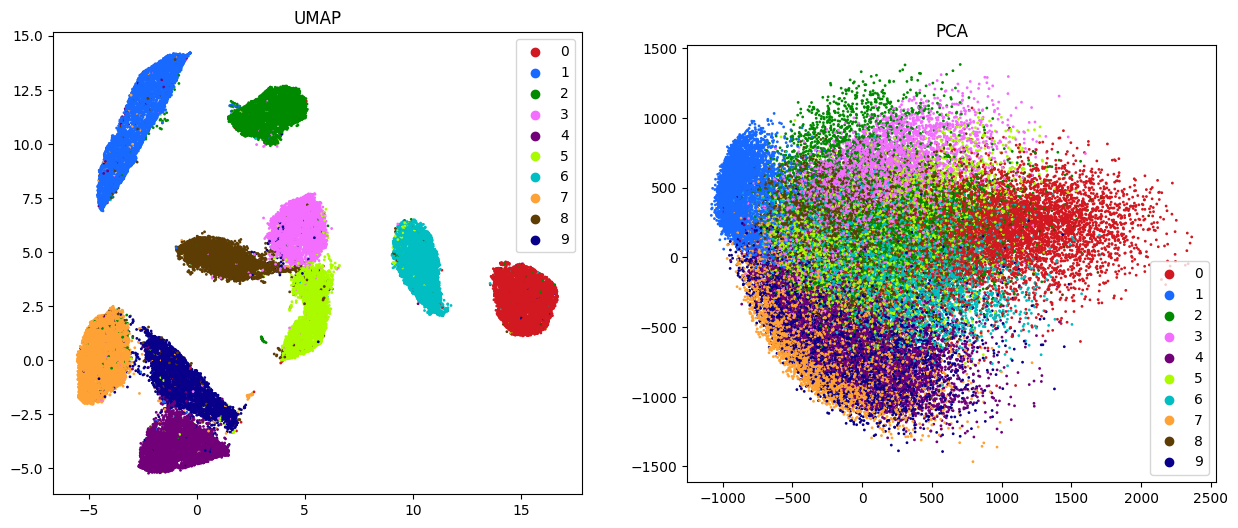

In [ ]:
import torchvision

mnist_dataset = torchvision.datasets.MNIST(root="./datasets", download=True)
mnist_array = np.array(
    [np.array(image_label[0]).flatten() for image_label in mnist_dataset]
)
mnist_labels = np.array([image_label[1] for image_label in mnist_dataset])

X = mnist_array
y = mnist_labels

X_umap, X_pca = plot_and_return_2d_embedding(X, y=y)

pointcloud shape: (60000, 784)
time create graph 5.031515121459961
time clustering 3.188701868057251
time optimization 206.0466890335083


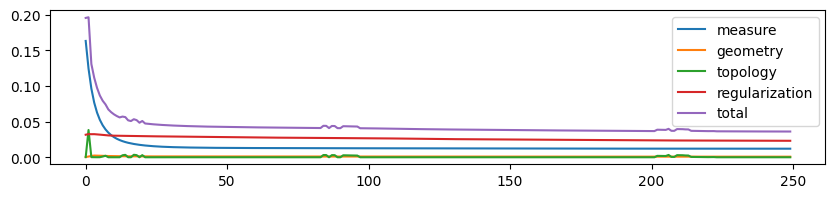

In [30]:
discover = ShapeDiscover(
    n_cover=15,
    loss_weights=[1,10,1,10],
    early_stop_tolerance=1e-5,
)
discover.fit(X)

In [ ]:
shapediscover_plot(
    discover,
    X_umap,
    y=y,
    cover_threshold=0.8,
    max_vertex_size=10,
    interactive=True,
    plot_subfunctions=["nerve", "cover"]
)